# **Rodrigo_Mesquita_PB_TP3**
## **Projeto de Bloco: Inteligência Artificial e Machine Learning [24E1_5]**

## 1.Criação das features:Aplicar Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos conjuntos de dados.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split


### Analisando o dataset

In [45]:
df = pd.read_csv('/workspaces/Faculdade/Datasets/healthcare-dataset-stroke-data.csv')

In [46]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [47]:
df.drop(columns=['id'], inplace=True)

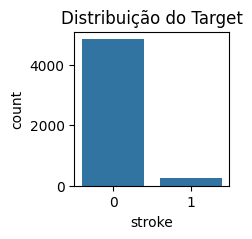

In [48]:
#Checando a distribuição
plt.figure(figsize=(2,2))
plt.title('Distribuição do Target')
sns.countplot(df, x='stroke')
plt.show()

In [49]:
# O dataset é altamente desbalanceado e apenas 5% das linhas são de paciêntes que tiveram derrame
print('Total de linhas:', df.shape[0])
print('Qtd linhas com Stroke=1:' ,len(df[df['stroke'] == 1]))

Total de linhas: 5110
Qtd linhas com Stroke=1: 249


In [50]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Identificando dados nulos

In [51]:
#Checando se há dados nulos
nulls = df.isnull().sum()
print(nulls)
print('Qtd linhas com Stroke=1:', len(df[df['stroke'] == 1]))
print('Qtd linhas com Stroke=1 e BMI nulo:', len(df[(df['stroke'] == 1) & (df['bmi'].isnull())]))

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
Qtd linhas com Stroke=1: 249
Qtd linhas com Stroke=1 e BMI nulo: 40


In [52]:
# Os nulos representam 16% das pessoas que tiveram derrame, então optei por utilizar o KNNImputer invés de os remover. 
# O apliquei através do Pipeline, junto com as demais normalizações mais abaixo.

### Separando os dados em treino e teste

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop(columns=['stroke'])
Y = df['stroke']

X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

### Aplicando One-Hot Encoder nas variáveis categóricas, StandartScaler nas numéricas e KNN Imputer na BMI

In [55]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline   import Pipeline
from sklearn.preprocessing   import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [69]:
#Listando colunas numéricas e categóricas
col_num = ['age','avg_glucose_level']
col_cat = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status']

#Definindo as transformações que devem ser aplicadas em cada tipo de variável.
pipe_bmi = Pipeline([    
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())    
    ])
pipe_num = Pipeline([    ('scaler', StandardScaler())    ])
pipe_car = Pipeline([    ('encoder', OneHotEncoder(handle_unknown='ignore'))     ])

#Informando as colunas em que as transformações devem ser executadas
preproc_pipeline_x = ColumnTransformer([
    ('impt',pipe_bmi, ['bmi']),
    ('num', pipe_num, col_num),
    ('cat', pipe_car, col_cat)
], remainder = 'passthrough')

#Dar o fit usando o conjunto de treino e o transform no treino e teste.
X_train_transf = preproc_pipeline_x.fit_transform(X_train)
X_test_transf = preproc_pipeline_x.transform(X_test)

### Calculando o PCA

In [76]:
%pip install rogeriopradoj-paretochart;

Note: you may need to restart the kernel to use updated packages.


In [77]:
from sklearn.decomposition import PCA
from paretochart.paretochart import pareto
import matplotlib.pyplot as plt

/home/codespace/.python/current/lib/python3.10/site-packages/paretochart/paretochart.py:198: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(yt)


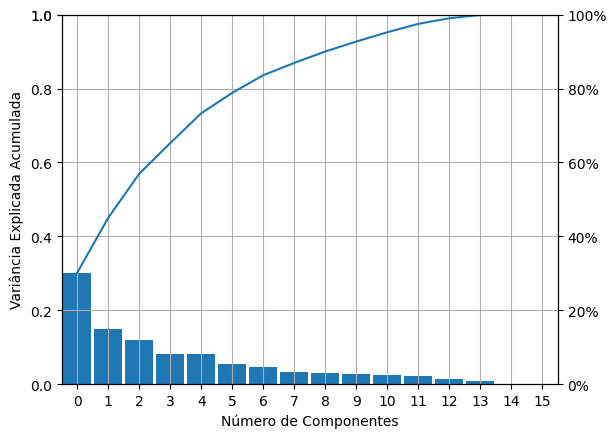

In [80]:
pca = PCA().fit(X_train_transf)

fig, ax = plt.subplots()
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
pareto(pca.explained_variance_ratio_)
ax.grid()
plt.show()

In [91]:
#Executando novamente com o número de componentes escolhido

pca = PCA(n_components=5).fit(X_train_transf)

X_train_pca = pca.transform(X_train_transf)
X_test_pca = pca.transform(X_test_transf)

In [97]:
pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5'], index = preproc_pipeline_x.get_feature_names_out())

,PC1,PC2,PC3,PC4,PC5
impt__bmi,0.506010,-0.294715,0.782320,0.013291,0.048912
num__age,0.631001,-0.135818,-0.534017,-0.001503,0.053211
num__avg_glucose_level,0.353667,0.913557,0.133829,-0.011863,-0.118958
cat__gender_Female,0.010124,-0.086361,-0.014189,-0.153185,-0.668839
cat__gender_Male,-0.010007,0.086038,0.014166,0.152829,0.668939
cat__gender_Other,-0.000118,0.000323,0.000023,0.000356,-0.000099
cat__hypertension_0,-0.070028,-0.020142,0.016154,-0.006227,-0.018459
cat__hypertension_1,0.070028,0.020142,-0.016154,0.006227,0.018459
cat__heart_disease_0,-0.038758,-0.025759,0.039225,-0.006967,-0.028042
cat__heart_disease_1,0.038758,0.025759,-0.039225,0.006967,0.028042


## 2.Modelo de ML:  Desenvolver e treinar modelos de árvores de decisão para tarefas de classificação.

## 3.Avaliação de Modelos: Aplicar técnicas de validação cruzada para estimar a eficiência dos modelos desenvolvidos.

## 4.Busca Hiperparamétrica: Utilizar GridSearch para otimizar os hiperparâmetros dos modelos.

## 5.Pruning de Árvores de Decisão: Realizar o pruning (poda) em árvores de decisão para prevenir o overfitting e melhorar a generalização do modelo.

## 6.Avaliação de Classificadores Binários: Utilizar figuras de mérito como Curva ROC, precisão, recall, f1-score, sensibilidade e especificidade para avaliar os modelos.

## 7.Baseado nos valores encontrados para as diferentes figuras de mérito, interprete os resultados e disserte sobre a eficiência do classificador criado.